In [1]:
#data is from Kaggle (https://www.kaggle.com/c/store-sales-time-series-forecasting)

In [2]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
series = read_csv('c://time_series/store/transactions.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [3]:
#Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))


        t   t+1
0     NaN   770
1   770.0  2111
2  2111.0  2358
3  2358.0  3487
4  3487.0  1922


In [4]:
# split into train and test sets, need to exclude first row with 'nan'
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [5]:
# persistence model
def model_persistence(x):
    return x

In [6]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 861.334


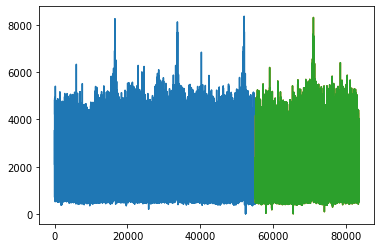

In [8]:
#Plot
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()
